In [1]:
input_notes=[]

In [3]:
from ipywidgets import *
from IPython.display import display, clear_output
import functools

notes=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B","C"]
pitchs=[60,61,62,63,64,65,66,67,68,69,70,71,72]
layout = widgets.Layout(
    width='40px', height='100px',
    border='1px solid black')

output = widgets.Output()

buttons = []
for note in notes:
    button = widgets.Button(
        description=note, layout=layout)
    
    button.style.button_color = ('white', 'lightgray')['#' in note]
    
    def on_button_click(b, note):
        with output:
            clear_output(wait = True)
            input_notes.append(pitchs[notes.index(note.description)])
            print("input_note",note.description)
            print("input_notes",input_notes)
            
    button.on_click(functools.partial(on_button_click, note))

    buttons.append(button)

piano = widgets.Box(children=buttons)

display(piano, output)

Box(children=(Button(description='C', layout=Layout(border='1px solid black', height='100px', width='40px'), s…

Output()

In [4]:
print(input_notes)

[60, 62, 64, 65, 67, 65, 64, 62, 60, 62, 64, 65, 67, 65, 64, 62, 60, 62, 64, 65, 67, 65, 64, 62, 60]


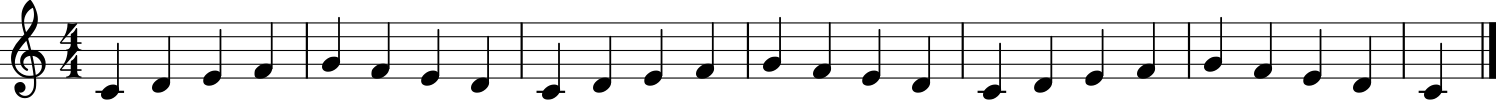

'input_notes.mid'

In [5]:
from music21 import *
s1 = stream.Stream()

for n in range(len(input_notes)):
    notePitch  = input_notes[n]
    noteLength= 1
    n = note.Note(midi=notePitch ,quarterLength = noteLength)

    s1.append(n)

s1.show()
s1.write("midi","input_notes.mid")

In [6]:
!python3 play.py "input_notes.mid"

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file input_notes.mid loaded!


In [7]:
import numpy as np

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Classifier
from htm.bindings.algorithms import Predictor

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [8]:
pitchParams = ScalarEncoderParameters()
pitchParams.minimum = 48
pitchParams.maximum = 83
pitchParams.activeBits = 3
pitchParams.size = 48
pitchParams.clipInput  = True

encPitch = ScalarEncoder(pitchParams)
print(encPitch.encode(60))
print(encPitch.encode(65))
print(encPitch.encode(71))

SDR( 48 ) 15, 16, 17
SDR( 48 ) 22, 23, 24
SDR( 48 ) 30, 31, 32


In [9]:
inputSDR  = SDR( dimensions = (48, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

In [10]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)

In [11]:
clsr = Classifier()
resolution = 1
minimum = 48

In [12]:
predictor = Predictor( steps=[1])
resolution = 1
minimum = 48

In [13]:
for i in range(len(input_notes)):
    print("Input: ",input_notes[i])
    inputSDR = encPitch.encode(input_notes[i])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    
    clsr.learn(tm.getActiveCells(), int((input_notes[i] - minimum) / resolution))
    classifier=np.argmax( clsr.infer( tm.getActiveCells() ) ) * resolution + minimum
    
    predictor.learn(i, tm.getActiveCells(), int((input_notes[i] - minimum) / resolution))
    pdf = predictor.infer( tm.getActiveCells() )
    
    if pdf[1]:
        prediction=np.argmax( pdf[1]) * resolution + minimum
    else:
        prediction=float("nan")
        
    print("Classifier: ",classifier)
    print("Prediction: ",prediction)

Input:  60
Classifier:  60
Prediction:  nan
Input:  62
Classifier:  62
Prediction:  48
Input:  64
Classifier:  64
Prediction:  48
Input:  65
Classifier:  65
Prediction:  65
Input:  67
Classifier:  67
Prediction:  67
Input:  65
Classifier:  65
Prediction:  67
Input:  64
Classifier:  64
Prediction:  65
Input:  62
Classifier:  62
Prediction:  64
Input:  60
Classifier:  60
Prediction:  62
Input:  62
Classifier:  62
Prediction:  60
Input:  64
Classifier:  64
Prediction:  62
Input:  65
Classifier:  65
Prediction:  67
Input:  67
Classifier:  67
Prediction:  65
Input:  65
Classifier:  65
Prediction:  67
Input:  64
Classifier:  64
Prediction:  62
Input:  62
Classifier:  62
Prediction:  60
Input:  60
Classifier:  60
Prediction:  62
Input:  62
Classifier:  62
Prediction:  64
Input:  64
Classifier:  64
Prediction:  65
Input:  65
Classifier:  65
Prediction:  67
Input:  67
Classifier:  67
Prediction:  65
Input:  65
Classifier:  65
Prediction:  64
Input:  64
Classifier:  64
Prediction:  62
Input:  62

In [26]:
test_notes=[]

In [27]:
from ipywidgets import *
from IPython.display import display, clear_output
import functools

notes=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B","C"]
pitchs=[60,61,62,63,64,65,66,67,68,69,70,71,72]
layout = widgets.Layout(
    width='40px', height='100px',
    border='1px solid black')

output = widgets.Output()

buttons = []
for note in notes:
    button = widgets.Button(
        description=note, layout=layout)
    
    button.style.button_color = ('white', 'lightgray')['#' in note]
    
    def on_button_click(b, note):
        with output:
            clear_output(wait = True)
            test_notes.append(pitchs[notes.index(note.description)])
            print("input_note",note.description)
            print("test_notes",test_notes)
            
    button.on_click(functools.partial(on_button_click, note))

    buttons.append(button)

piano = widgets.Box(children=buttons)

display(piano, output)

Box(children=(Button(description='C', layout=Layout(border='1px solid black', height='100px', width='40px'), s…

Output()

In [28]:
print(test_notes)

[65, 67, 65]


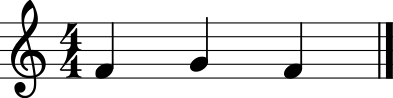

'test_notes.mid'

In [29]:
from music21 import *
s2 = stream.Stream()

for n in range(len(test_notes)):
    notePitch  = test_notes[n]
    noteLength= 1
    n = note.Note(midi=notePitch ,quarterLength = noteLength)

    s2.append(n)

s2.show()
s2.write("midi","test_notes.mid")

In [30]:
!python3 play.py "test_notes.mid"

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file test_notes.mid loaded!


In [31]:
for i in range(len(test_notes)):
    print("Input: ",test_notes[i])
    inputSDR = encPitch.encode(test_notes[i])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    
    clsr.learn(tm.getActiveCells(), int((input_notes[i] - minimum) / resolution))
    classifier=np.argmax( clsr.infer( tm.getActiveCells() ) ) * resolution + minimum
    
    #predictor.learn(i, tm.getActiveCells(), int((input_notes[i] - minimum) / resolution))
    pdf = predictor.infer( tm.getActiveCells() )
    
    if pdf[1]:
        prediction=np.argmax( pdf[1]) * resolution + minimum
    else:
        prediction=float("nan")
        
    print("Classifier: ",classifier)
    print("Prediction: ",prediction)

Input:  65
Classifier:  65
Prediction:  67
Input:  67
Classifier:  67
Prediction:  65
Input:  65
Classifier:  65
Prediction:  64


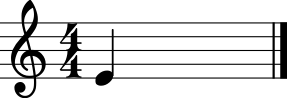

'predict_notes.mid'

In [32]:
from music21 import *
s3 = stream.Stream()

notePitch  = prediction
noteLength= 1
n = note.Note(midi=notePitch ,quarterLength = noteLength)

s3.append(n)

s3.show()
s3.write("midi","predict_notes.mid")

In [33]:
!python3 play.py "predict_notes.mid"

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file predict_notes.mid loaded!
